<a href="https://colab.research.google.com/github/hihunjin/Code-snippet-for-everything/blob/main/img_mask_overlay_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#@title
%%capture

!wget -c https://docs.opencv.org/master/water_coins.jpg -O water_coins.jpg
!wget -c https://docs.opencv.org/master/water_thresh.jpg -O water_thresh.jpg

In [35]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


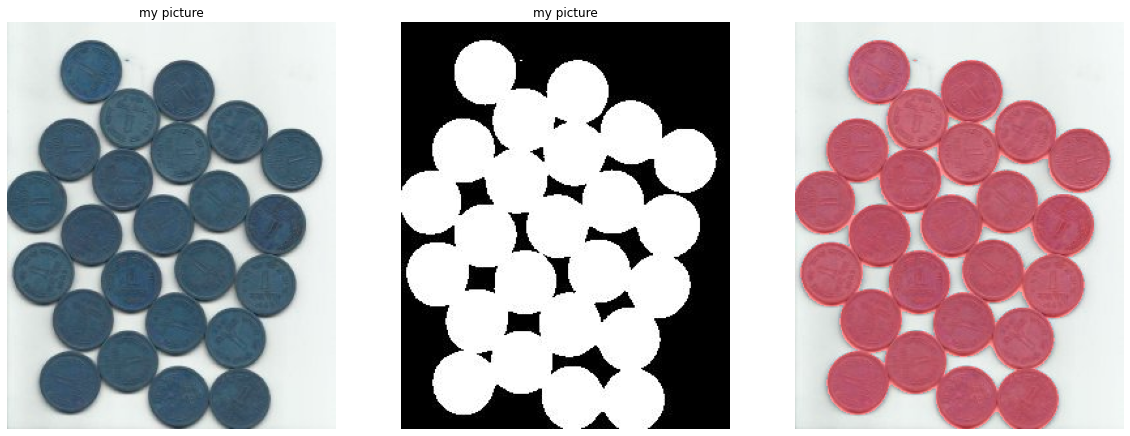

In [45]:
#@title { display-mode: "form", run: "auto" }

'''
jupyter notebook or colab is desired
'''
#@markdown Transparency
transparency = 0.5 #@param {type:"slider", min: 0, max:1, step:0.05}

##### read image and mask
image = cv2.imread('water_coins.jpg')
mask = cv2.imread('water_thresh.jpg', 0)
image = np.float64(image)/256.
mask = mask/256.

### size
fig = plt.figure(figsize=(20,20))

### image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('my picture')
plt.axis('off')

### mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('my picture')
plt.axis('off')

### colorize
cmap = matplotlib.colors.ListedColormap(['black', 'red'])
mask_rgb = cmap(mask)           ###### mask_rgb.shape = (:,:,4) : RGBA channel  #####

### combine
added_image = cv2.addWeighted(image[:,:,:3],1.,mask_rgb[:,:,:3],transparency,0)

### overlay
plt.subplot(1, 3, 3)
plt.imshow(added_image)
plt.axis('off')
plt.show()